# 1.Giriş

## 1.1. Problemin Tanımı

### 1.1.1. Projenin Amacı: 

Bu projenin asıl amacı, müşterilerin çevrimiçi satın alım davranışlarını analiz ederek,  müşterilerin satın alma davranışını tahmin etmektir. Bu yöntem, işletmelerin kendi e-ticaret platformlarını optimize ederek pazarlama stratejilerini geliştirmeleri ve bu şekilde satış hacimlerini artırmayı hedeflemektedir.

### 1.1.2. Projenin Kapsamı: 

Bu proje, satın almayı sağlayan etken faktörleri belirlemeyi, var ise ortak noktaları bulmayı, ve bu yöntemle ilgili kişilerin veya kurumların satış yöntemlerini optimize etmeyi hedeflemektedir.

### 1.1.3. Projeden Beklenen Sonuçlar: 

Projenin sonucundan beklenen davranış, müşteri satın alım davranışını en nihai şekli ile tahmin edebilecek bir makine öğrenme modeli geliştirmektir, bu sayede, hangi müşteri davranışlarının da satın almayı en çok etkilediği belirlenecektir.


## 2. Metodoloji

### 2.1. Gerekli Verilerin Bulunması

Kullanılan "Online Shoppers Purchasing Intention" veri seti, PageValues, ExitRates, VisitorType gibi müşteri satın alım davranışlarını içerir. Bu veri seti, açık kaynak bir veri deposu olan "UC Irvine Machine Learning Repository" sitesinden projeye dahil edilmiştir. 

(https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset)

### 2.2. Genel Analiz Algoritmasının Seçilmesi

Proje süreçleri boyunca tek bir algoritmaya bağlı kalınmayacaktır. Proje hedef değişkeni kategorik (satın aldı/satın almadı) bir değişken olduğu için doğru sonucu bulabilmek adına sınıflandırma algoritmaları ele alınacaktır. Birkaç sınıflandırma algoritması arasından, bu veri seti için en optimize sonucu veren algoritma, modeli eğitmek için seçilerek son haline getirilecektir. Performans metriği açısından karşılaştırılan sınıflandırma algoritmaları şunlardır:

#### 2.2.1. Lojistik Regresyon: 
Bağımlı değişkenin ikili (kategorik) olduğu durumlarda kullanılan sınıflandırma modelidir. Bu projenin hedef değişkenine uygun olduğundan seçilen ilk modeldir. (https://medium.com/@batubilgili1907.bb/lojistik-regresyon-logistic-regression-de24f0c7147a)

#### 2.2.2. K-En Yakın Komşu (KNN): 
Verisetindeki gözlemlerin, tahmin edilmek istenen gözleme yakınlıkları dikkate alınarak sınıflandırıldığı bir algoritmadır. Bu sınıflandırma sonucu en çok rastlanan sonuç tahmini ortaya çıkaracaktır. (https://miuul.com/blog/k-en-yakin-komsu-algoritmasi-nasil-calisir)

### 2.2.3. Karar Ağacı: 
Verisetini sürekli daha detaylı ve küçük parçalara bölerek tahmin sonucunu anlamlandırmaya çalışan ağaç tabanlı bir algoritmadır. Sınıflandırma problemleri için idealdir. (https://erdincuzun.com/makine_ogrenmesi/decision-tree-karar-agaci-id3-algoritmasi-classification-siniflama/)

### 2.2.4. Rastgele Orman: 
Birçok karar ağacı yapısını bir araya getirerek daha ayrıntılı ve doğru bir sonuç bulmayı hedefleyen ağaçtabanlı algoritma türüdür. Ağaç sayısı yükseldikçe doğru sonuca yaklaşım oranı artar. (https://medium.com/@cemthecebi/rastgele-orman-algoritmas%C4%B1-1600ca4f4784)

### 2.2.5. Gradient Boosting: 
Gradient Boosting, güçlü bir artırma algoritmasıdır; burada her yeni model, gradyan inişi kullanılarak önceki modelin ortalama kayıp fonksiyonunu en aza indirmek için eğitilir.  (https://www.geeksforgeeks.org/ml-gradient-boosting/)

### 2.2.6. XGBoost: 
Gradient boosting'in daha optimize edilmiş ve performansı yükseltilmiş halidir. Her seferinde modelin hatalarını en aza indirerek yeni bir model eklemesi yapar. (https://efecanxrd.medium.com/xgboost-algoritmas%C4%B1-6703b14efd5)

### 2.2.7. LightGBM: 

XGBoost gibi ağaç tabanlı bir boosting algoritmasıdır. Büyük veri uygulamalarında kullanılabilir. 
Diğer modellere göre daha hızlı ve yüksek performanslı olduğundan yüksek oranda tercih sebebidir.  (https://medium.com/kaveai/matemati%C4%9Fi-ve-python-uygulamas%C4%B1yla-lightgbm-hafif-gradyan-art%C4%B1rma-makinesi-18d2f12e7870)



## 2.3 Veri Ön İşleme (Veri Temizleme ve Kontrol Etme)

Veri ön işleme adımları uygulanmaya başlamadan önce, projenin ilerlemesi için gerekli olan kütüphaneler uygulamaya dahil edilmiştir.

In [286]:
import pandas as pd
import numpy as np
import warnings
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

Çıktıyı temiz tutmak için ortam yok sayılabilecek uyarılardan arındırılmıştır.

In [287]:
warnings.filterwarnings("ignore")

İlgili veri seti, pandas kütüphanesinden yararlanılarak uygulamaya dahil edilmiştir.

In [288]:
df = pd.read_csv("online_shoppers_intention.csv")
print(df.shape[0])

12330


### 2.3.1. Sütunları Tanımlama

#### 2.3.1.1. Kategorik Sütunlar: 
Sınıflandırılabilecek veriler içeren sütunlardır. Genellikle iki veya daha fazla sınıfı kategorize eder. Bu tabloda, Ziyaretçi türü (VisitorType) ve ay (Month) gibi sayısal olmayan verileri belirtir.

#### 2.3.1.2. Sayısal Sütunlar: 
Numerik değerler içeren sütunlardır. Bu tabloda, sayfa değerleri (PageValues), çıkış oranları (ExitRates) gibi sayısal verileri ifade eder.

#### 2.3.1.3. Kardinal Sütunlar: 
Kardinal sütunlar, büyük sayıda benzersiz değere sahip kategorik sütunları ifade eder. Bunlar, var oldukları senaryoda, gözlemlenmesi zor, ve etkisi azımsanabilecek sütunlar olarak baz alınmıştır.

Veri ön işleme sırasında yardımcı olması için kullanılacak metotlar sırasıyla tanımlanmıştır. 
Metotların her biri açıklamalarıyla birlikte gösterilmektedir: 

### 2.3.2. Sütunların Sınıflandırılması

Tanımlanan ilk fonksiyon, veri çerçevesindeki kategorik, sayısal ve kardinal sütunları belirlemek için kullanılacaktır. Aşağıda, kategorik gibi görünen sayısal sütunlar, sayısal gibi görünen kategorik sütunlar ya da kategorik gibi görünen kardinal sütunlar hesaplamaya dahil edilmiştir. Hesaplamaları en doğru şekilde yapmak için, çeşitli eşik değerleri belirlenmiştir: 

cat_th: Kategorik olarak değerlendirilecek sayısal sütunlar için eşik değeri
car_th: Kategorik sütunların kardinal olarak kabul edilmesi için eşik değeri

In [289]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtype != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtype == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    return cat_cols, num_cols, cat_but_car


In [290]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [291]:
print("Kategorik sütunlar: ", cat_cols)
print("Numerik sütunlar: ", num_cols)
print("Kardinal Sütunlar: ", cat_but_car)

Kategorik sütunlar:  ['Month', 'VisitorType', 'SpecialDay', 'OperatingSystems', 'Region', 'Weekend', 'Revenue']
Numerik sütunlar:  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'Browser', 'TrafficType']
Kardinal Sütunlar:  []


### 2.3.3. Ön İşlemeden Önce İstatistiklerin Hesaplanması

In [292]:
df_num = pd.DataFrame(df, columns=num_cols)
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
Browser,12330.0,2.357097,1.717277,1.0,2.000000,2.000000,2.000000,13.000000


### 2.3.4. Eksik Değerlerin Ele Alınması
Bu projede eksik değerlere sahip satır bulunmamaktadır.

In [293]:
# Null değerlerin sayısını yazdır
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


### 2.3.5. Aykırı Değerlerin Ele Alınması

#### 2.3.5.1. Aykırı Değer: 
Diğer gözlemlerden oldukça uzak olan gözleme aykırı veya uç değer denir. Aykırı gözlemler, veri setinin geri kalanından belirgin bir oranda farklıdır ve performans metriklerinin değerlendirilmesinde doğru olmayan sonuçların ortaya çıkmasına sebep olabilir. Bu sebeple veri setinde doğru şekilde yönetilmelidir. (https://ravenfo.com/2021/02/11/aykiri-deger-analizi/)


#### 2.3.5.1. IQR Yöntemi 

IQR (Interquartile Range): Çeyrekler açıklığı da denebilir. 1. çeyrek (%25) ile 3. çeyrek (%75) arasındaki aralıktır.
Alt Limit: Tolere edilebilir minimum değerdir, bu değerin altındaki veriler aykırı olarak kabul edilir.
Üst Limit: Kabul edilebilir maksimum değerdir, bu değerin üstündeki veriler aykırı olarak kabul edilir.


Bu metotta, veri setindeki aykırı değerler IQR yöntemi ile ele alınarak, veri bütünlüğü ve tutarlılığı geliştirilmesi amaçlanmıştır: 

In [294]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    """
    Bu fonksiyon, IQR'e dayanarak aykırı değerler için alt ve üst eşikleri hesaplar.
    q1: 1. çeyrek
    q3: 3. çeyrek
    """
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range
    return low_limit, up_limit

In [295]:
def count_outliers(dataframe, col_name):
    """
    Bu fonksiyon, sütundaki aykırı değerlerin sayısını hesaplar.
    """
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers = dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)]
    return outliers.shape[0]

Aykırı değerlerin ele alınmasını daha iyi anlamak amacıyla, aykırı değerler ayrıştırılmadan önceki ve sonraki kutu grafikleri ve değer sayıları incelenebilir:

In [296]:
print("Aykırı Değerlerin Sayısı")
for col in num_cols:
    outlier_count = count_outliers(df, col)
    print(f"{col}: {outlier_count}")

Aykırı Değerlerin Sayısı
Administrative: 404
Administrative_Duration: 1172
Informational: 2631
Informational_Duration: 2405
ProductRelated: 987
ProductRelated_Duration: 961
BounceRates: 1551
ExitRates: 1099
PageValues: 2730
Browser: 4369
TrafficType: 2101


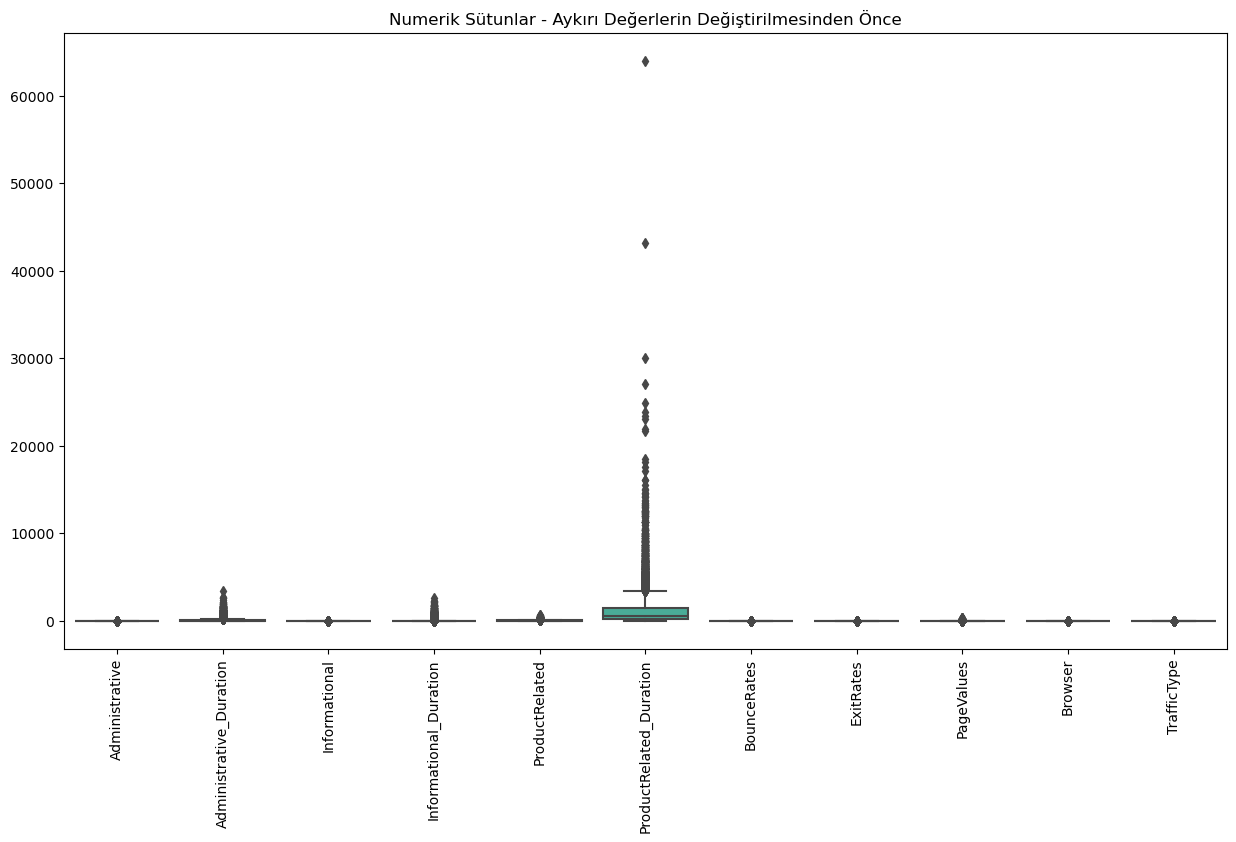

In [297]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[num_cols])
plt.title('Numerik Sütunlar - Aykırı Değerlerin Değiştirilmesinden Önce')
plt.xticks(rotation=90)
plt.show()

Aşağıdaki metot kullanılarak, aykırı değerlerin eşik değerleri ile değiştirilmesi sağlanacaktır:

In [298]:
def replace_with_thresholds(dataframe, variable):
    """
    Bu fonksiyon, aykırı değerleri eşik değerlerle değiştirir.
    """
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


Aykırı değerler eşik değerleri ile değiştirilir: 

In [299]:
for col in num_cols:
    replace_with_thresholds(df, col)


In [300]:
print("Aykırı Değerlerin Sayısı")
for col in num_cols:
    outlier_count = count_outliers(df, col)
    print(f"{col}: {outlier_count}")

Aykırı Değerlerin Sayısı
Administrative: 0
Administrative_Duration: 0
Informational: 0
Informational_Duration: 0
ProductRelated: 0
ProductRelated_Duration: 0
BounceRates: 0
ExitRates: 0
PageValues: 0
Browser: 0
TrafficType: 0


Aykırı değerler eşik değerleri ile değiştirildikten sonra, veri dağılımı aşağıdaki gibi olacaktır. Veri artık daha bütün ve tutarlı durumdadır: 

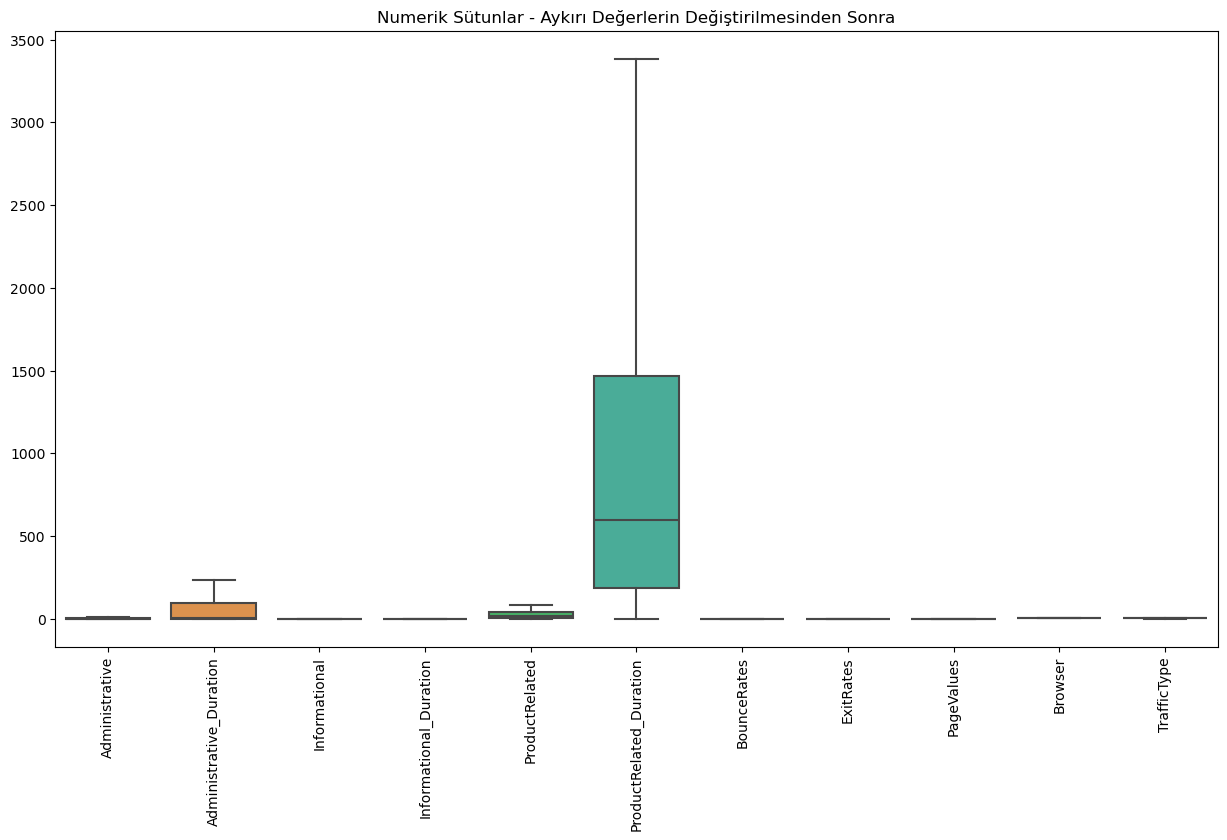

In [301]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[num_cols])
plt.title('Numerik Sütunlar - Aykırı Değerlerin Değiştirilmesinden Sonra')
plt.xticks(rotation=90)
plt.show()


Yukarıda ele alınan yöntem ile aykırı değerlerin eşik değerleri ile değiştirilmesinin sebepleri aşağıdaki gibi sıralanabilir:  

- Aykırı değer sayısı çok fazla olduğundan, aykırı değerlerin tamamının ortadan kaldırılması halinde veri setinde büyük bir veri kaybı olacağından bu değerlerin değiştirilmesi yöntemi seçilmiştir.
- Mean, medyan gibi değerler yerine eşik değerleri ile değiştirilmesinin asıl sebebi, kaybolan aykırı veriye en yakın ve en optimize sonucu vermektir. Bu sayede, veri seti daha gerçekçi değerlere bağlı kalacaktır. Genelleme sonuçlarını tamamen ortadan kaldırmadan anlamlı bir sonuç alabilmek için etkili bir yöntemdir.

### 2.3.6. One Hot Encoding 

One Hot Encoding, kategorik değişkenlerin ikili (binary) olarak temsil edilmesi anlamına gelmektedir. 
Bu temsil, kategorik değişkenlerin makine öğrenmesi modellerinde kullanılmalarını sağlamak için sayısal formata dönüştürülmelerini sağlar. Aşağıdaki metot, uygulamadaki kategorik değişkenlerin istenilen formata dönüştürülmesini sağlamaktadır: [https://womaneng.com/one-hot-encoding-nedir-nasil-yapilir/]

In [302]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    """
    Bu fonksiyon, kategorik sütunlarda one hot encoding yapar.
    drop_first: Çoklu doğrusal bağlantıyı önlemek için kategorik değişkenin ilk seviyesinin düşürülüp düşürülmeyeceği anlamına gelir.
    """
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


In [303]:
# Kategorik değişkenlerin encode edilmesi: 
df = one_hot_encoder(df, cat_cols)

# Encoding işleminden sonra numerik değerlerin güncellenmesi
cat_cols, num_cols, cat_but_car = grab_col_names(df)

###  2.3.7. Özellik Ölçeklendirme

StandardScaler, verilerin daha tutarlı/bütünsel bir şekilde işlenmesine olanak tanır. 
Verilerin farklı ölçeklerde olması, kullanılan algoritmaların doğru bir şekilde çalışmasına engel olabilmektedir. 
Bu nedenle, standardizasyon işlemi, projede kullanılanlara benzer makine öğrenmesi algoritmalarının daha iyi performans göstermesini sağlayacaktır (Veri, algoritmaya uygun hale gelecektir). 

Uygulamada kullanılacak algoritmaların performans metriklerinin iyileştirilmesi için StandardScaler (standardizasyon) yöntemi aşağıdaki gibi kullanılmıştır: [https://asliasutay.com/standardscaler-nedir/#:~:text=Standardscaler%2C%20verilerin%20daha%20tutarl%C4%B1%20bir%20%C5%9Fekilde%20i%C5%9Flenmesine%20olanak%20tan%C4%B1r.,daha%20iyi%20performans%20g%C3%B6stermesini%20sa%C4%9Flar.] 

In [304]:
# Sayısal özellikleri ölçeklendir
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

## 2.4. Düzenlenmiş Verilerin Ön Analizi (Küçük Bir Analiz Gerçekleştirme)

In [305]:
df_after = pd.DataFrame(df, columns=num_cols)
df_after.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,-4.494918e-17,1.000041,-0.751846,-0.751846,-0.409909,0.615903,2.667526
Administrative_Duration,12330.0,-1.192882e-16,1.000041,-0.718922,-0.718922,-0.624282,0.457850,2.223008
ProductRelated,12330.0,5.532206e-17,1.000041,-1.061272,-0.782996,-0.345706,0.449366,2.297909
ProductRelated_Duration,12330.0,-1.844069e-17,1.000041,-0.958002,-0.779761,-0.378243,0.459274,2.317826
BounceRates,12330.0,-1.567458e-16,1.000041,-0.734733,-0.734733,-0.525485,0.395559,2.090999
ExitRates,12330.0,-9.220344e-18,1.000041,-1.194651,-0.726455,-0.370183,0.444034,2.199769


###  2.4.1. İstatistiklerdeki Değişiklikler

**Ortalama (Mean):** Veri ön işleme sonrası tüm özelliklerin ortalamalarının sıfıra çok yakın olduğu görülmektedir. 
Bu, verilerin standardize hale geldiğini göstermektedir. (Standardizasyon)
Standardizasyon işlemi, her bir özelliğin ortalamasını 0,  ve standart sapmasını 1 yapmaya çalışır. (0'a ve 1'e yakınsar.)

**Standart Sapma (Std):** 
Veri ön işleme sonrası tüm özelliklerin standart sapmalarının bire çok yakın olduğu görülmektedir. 
Bu da verilerin standardize hale gelmesinin bir sonucudur. (Standardizasyon)

**Minimum ve Maksimum Değerler (Min ve Max):** Veri ön işleme işlemleri öncesi ve sonrası minimum ve maksimum değerlerde büyük ölçüde değişiklikler gözlenmektedir. Aykırı değerlerin sınırlandırılması ve tüm verilerin standardize edilmesi değer aralıklarının daralmasına sebep olmuştur.

**Çeyrek Değerler (%25, %50, %75):** Çeyrek değerler de, minimum ve maksimum değerler gibi standartizasyon işlemi sebebiyle değişikliğe uğramıştır. Verilerin daha küçük bir aralıkta olduğu ve merkezi eğilimin standartlaştırıldığı  görülmektedir.

Bu değişikliklere bakılarak, veri setindeki özelliklerin ölçeklenmiş hale getirilmesi ve aykırı değerlerin değiştiirlmesi ile verilerin modelleme için daha uygun hale getirildiği gözlemlenebilir. Tüm bu ön işlemler, modelin doğruluğunu ve performansını artırmak için yapılmıştır.

### 2.5. Kapsamlı Analiz (Büyük Gerçek Analiz Gerçekleştirme)

#### 2.5.1. Model Eğitimi ve Değerlendirme
Yukarıda bahsedilen bu veri seti için seçilmiş makine öğrenmesi algoritmaları, çapraz doğrulama yöntemi kullanılarak eğitimden geçirilmiştir ve bu performanslar doğruluk (accuracy), F1 skoru ve ROC AUC değerlerine göre kıyaslanmıştır. Bu eğitim ve değerlendirme sırasında aşağıdaki aşamalardan geçilmiştir:

**2.5.1.1. Hiperparametre Optimizasyonundan Önce Metriklerin Değerlendirilmesi**

**2.5.1.1.1. Performans Metriklerinin Açıklaması**:

**2.5.1.1.2. Doğruluk (Accuracy)**: Bir modelin doğruluğunu ölçmek için kullanılan performans metriğidir. Tek başına ele alındığında nihai sonuç vermeyebilir. (https://medium.com/@gulcanogundur/do%C4%9Fruluk-accuracy-kesinlik-precision-duyarl%C4%B1l%C4%B1k-recall-ya-da-f1-score-300c925feb38)

**2.5.1.1.3. F1 Skoru:**: F1 Skoru, Hassasiyet (Precision) ve Duyarlılık (Recall) skorlarının dengeli bir ortalamasıdır. Dengesiz veri setlerinde performans değerlendirilmesi için kullanılabilir. (https://medium.com/academy-team/makine-%C3%B6%C4%9Frenmesi-s%C4%B1n%C4%B1fland%C4%B1rma-modelleri-accuracy-precission-recall-f1-score-log-loss-and-e2c37fbcf285)

**2.5.1.1.4. ROC AUC:** Matematiksel bir eğriyi ve altında kalan alanı temsil eder. Bu değer, öğrenme modelinin sınıfları ayırt edebilme yeteneğini ölçer.(https://medium.com/@gulcanogundur/roc-ve-auc-1fefcfc71a14)

In [306]:
df['Revenue'] = df['Revenue_True']
X = df.drop(['Revenue', 'Revenue_False', 'Revenue_True'], axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'Lojistik Regresyon': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Karar Ağacı': DecisionTreeClassifier(),
    'Rastgele Orman': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(verbosity=-1)  # Uyarı ve bilgi mesajlarını bastırmak için verbosity'yi -1 olarak ayarla
}
results = {'Model': [], 'Train Accuracy': [], 'Test Accuracy': [], 'F1 Score': [], 'ROC AUC': []}
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_pred)
    print(f'{name} - Eğitim Doğruluğu: {train_accuracy}, Test Doğruluğu: {test_accuracy}, F1 Skoru: {f1}, ROC AUC: {roc_auc}')
    results['Model'].append(name)
    results['Train Accuracy'].append(train_accuracy)
    results['Test Accuracy'].append(test_accuracy)
    results['F1 Score'].append(f1)
    results['ROC AUC'].append(roc_auc)

results_df = pd.DataFrame(results)

Lojistik Regresyon - Eğitim Doğruluğu: 0.8475263584752636, Test Doğruluğu: 0.8345498783454988, F1 Skoru: 0.04225352112676057, ROC AUC: 0.5094890510948905
KNN - Eğitim Doğruluğu: 0.8699310624493106, Test Doğruluğu: 0.8203568532035685, F1 Skoru: 0.24013722126929674, ROC AUC: 0.5603406326034063
Karar Ağacı - Eğitim Doğruluğu: 0.9998986212489862, Test Doğruluğu: 0.764801297648013, F1 Skoru: 0.2944038929440389, ROC AUC: 0.5766423357664233
Rastgele Orman - Eğitim Doğruluğu: 0.9998986212489862, Test Doğruluğu: 0.8349553933495539, F1 Skoru: 0.13588110403397027, ROC AUC: 0.5321167883211678
Gradient Boosting - Eğitim Doğruluğu: 0.8567518248175182, Test Doğruluğu: 0.8329278183292782, F1 Skoru: 0.07207207207207207, ROC AUC: 0.5153284671532846
XGBoost - Eğitim Doğruluğu: 0.9448499594484996, Test Doğruluğu: 0.8260340632603407, F1 Skoru: 0.2407079646017699, ROC AUC: 0.5618004866180049
LightGBM - Eğitim Doğruluğu: 0.8908150851581509, Test Doğruluğu: 0.8321167883211679, F1 Skoru: 0.16194331983805668, R

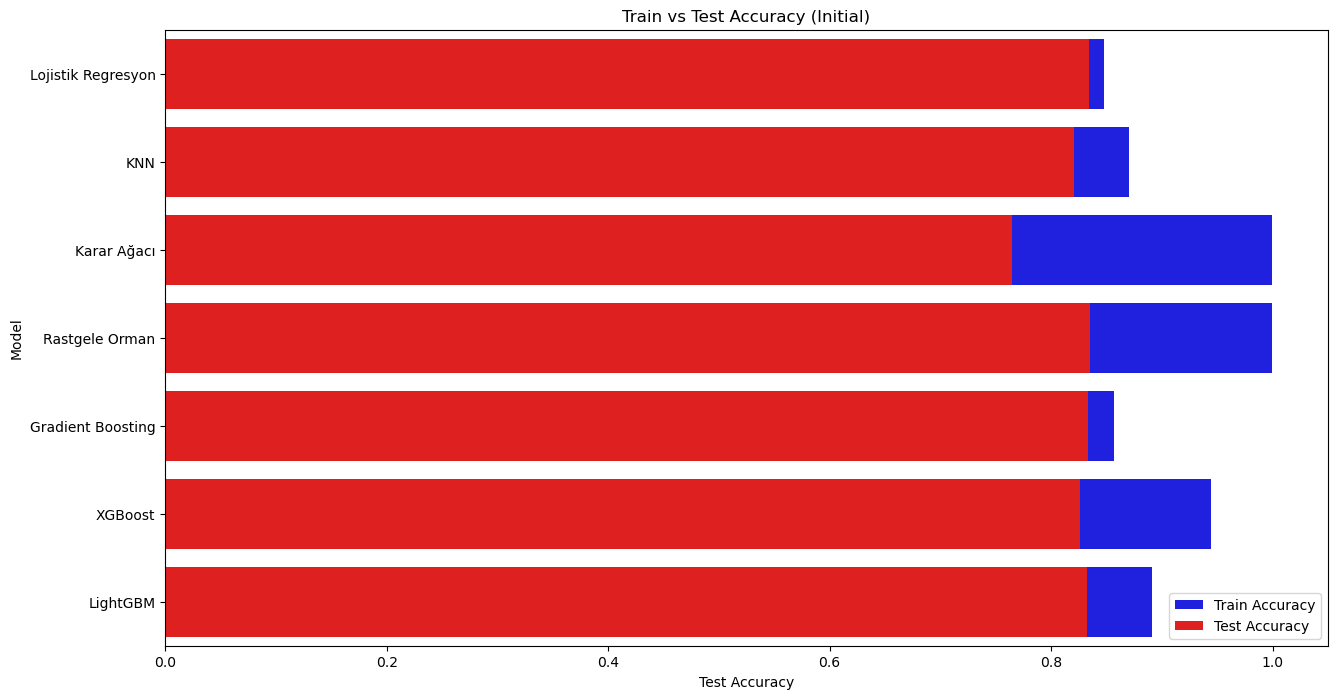

In [307]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Train Accuracy', y='Model', data=results_df, color='blue', label='Train Accuracy')
sns.barplot(x='Test Accuracy', y='Model', data=results_df, color='red', label='Test Accuracy', ax=ax)
plt.title('Train vs Test Accuracy (Initial)')
plt.legend(loc='lower right')
plt.show()

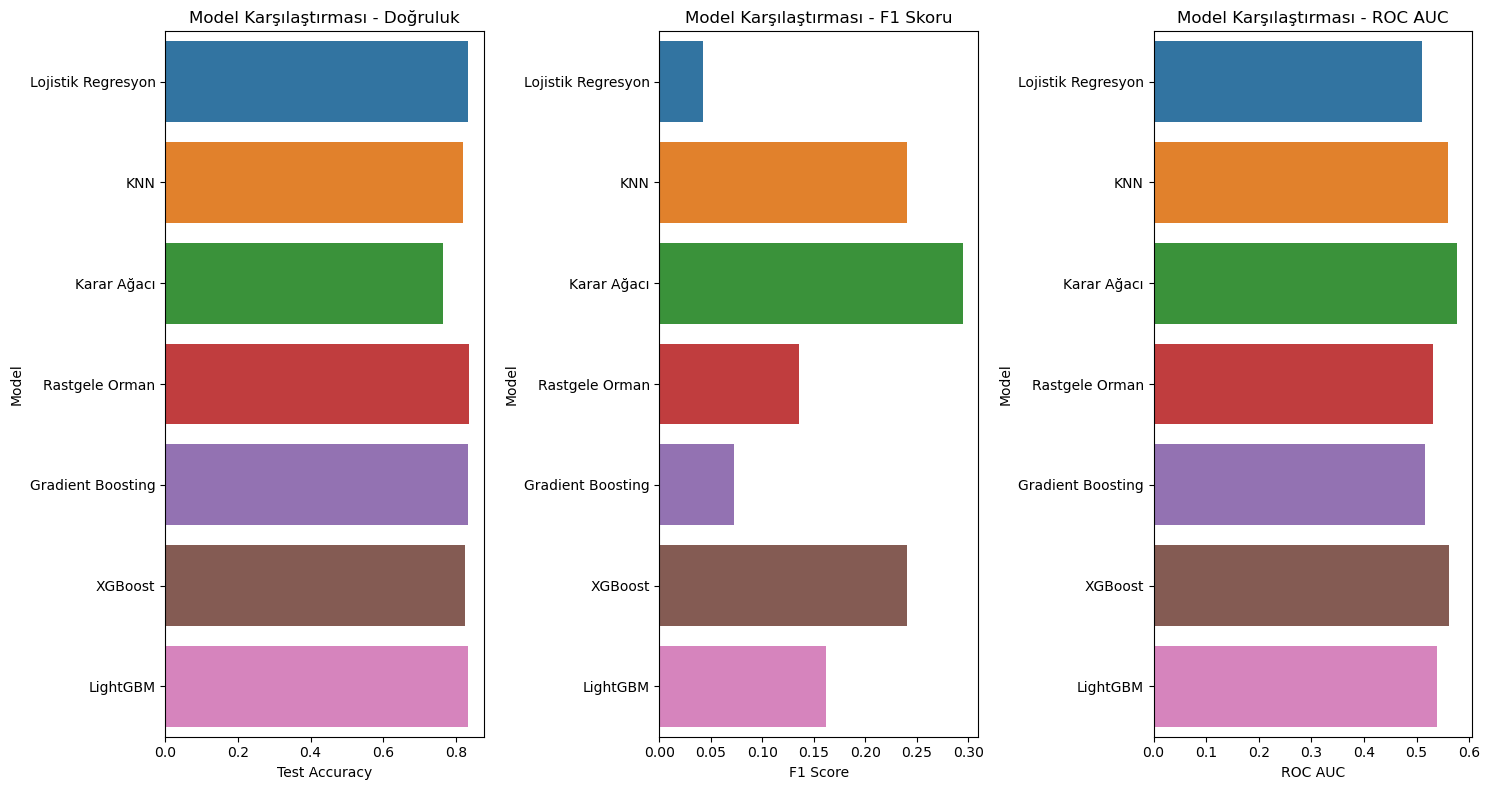

In [308]:
# Model performansını görselleştir
fig, axes = plt.subplots(1, 3, figsize=(15,8))
sns.barplot(x='Test Accuracy', y='Model', data=results_df, ax=axes[0])
axes[0].set_title('Model Karşılaştırması - Doğruluk')

sns.barplot(x='F1 Score', y='Model', data=results_df, ax=axes[1])
axes[1].set_title('Model Karşılaştırması - F1 Skoru')

sns.barplot(x='ROC AUC', y='Model', data=results_df, ax=axes[2])
axes[2].set_title('Model Karşılaştırması - ROC AUC')

plt.tight_layout()
plt.show()

#### 2.5.1.2. Hiperparametre Optimizasyonu

Hiperparametre optimizasyonu, bir algoritma için belirlenen performans metriğine göre en uygun hiperparametre kombinasyonunu bulma işlemidir. (https://medium.com/bili%C5%9Fim-hareketi/hiperparametre-optimizasyonu-9ba0e7f32e6f)
Grid search, farklı parametre kombinasyonlarını sürekli olarak test eder ve en iyi olanı bulur.

In [309]:
# Seçilen modeller için hiperparametre optimizasyonu
param_grid = {
    'Rastgele Orman': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]},
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1]},
    'LightGBM': {'n_estimators': [100, 200], 'max_depth': [10, 20], 'learning_rate': [0.01, 0.1], 'num_leaves': [31, 63, 127]}
}

best_models = {}
for name, classifier in classifiers.items():
    if name in param_grid:
        grid_search = GridSearchCV(classifier, param_grid[name], cv=5, scoring='roc_auc', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f'{name} en iyi parametreler: {grid_search.best_params_}')
    else:
        classifier.fit(X_train, y_train)
        best_models[name] = classifier


Rastgele Orman en iyi parametreler: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
XGBoost en iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
LightGBM en iyi parametreler: {'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 200, 'num_leaves': 31}


##### 2.5.1.2.1 Hiperparametre Optimizasyonundan Sonra Metriklerin Değerlendirilmesi

Lojistik Regresyon after tuning - Accuracy: 0.8345498783454988, F1 Score: 0.04225352112676057, ROC AUC: 0.5094890510948905
KNN after tuning - Accuracy: 0.8203568532035685, F1 Score: 0.24013722126929674, ROC AUC: 0.5603406326034063
Karar Ağacı after tuning - Accuracy: 0.7611516626115167, F1 Score: 0.27194066749072926, ROC AUC: 0.5637469586374696
Rastgele Orman after tuning - Accuracy: 0.8353609083536091, F1 Score: 0.03333333333333333, ROC AUC: 0.508029197080292
Gradient Boosting after tuning - Accuracy: 0.8329278183292782, F1 Score: 0.07207207207207207, ROC AUC: 0.5153284671532846
XGBoost after tuning - Accuracy: 0.8345498783454988, F1 Score: 0.05116279069767442, ROC AUC: 0.5114355231143553
LightGBM after tuning - Accuracy: 0.8353609083536091, F1 Score: 0.03333333333333333, ROC AUC: 0.508029197080292


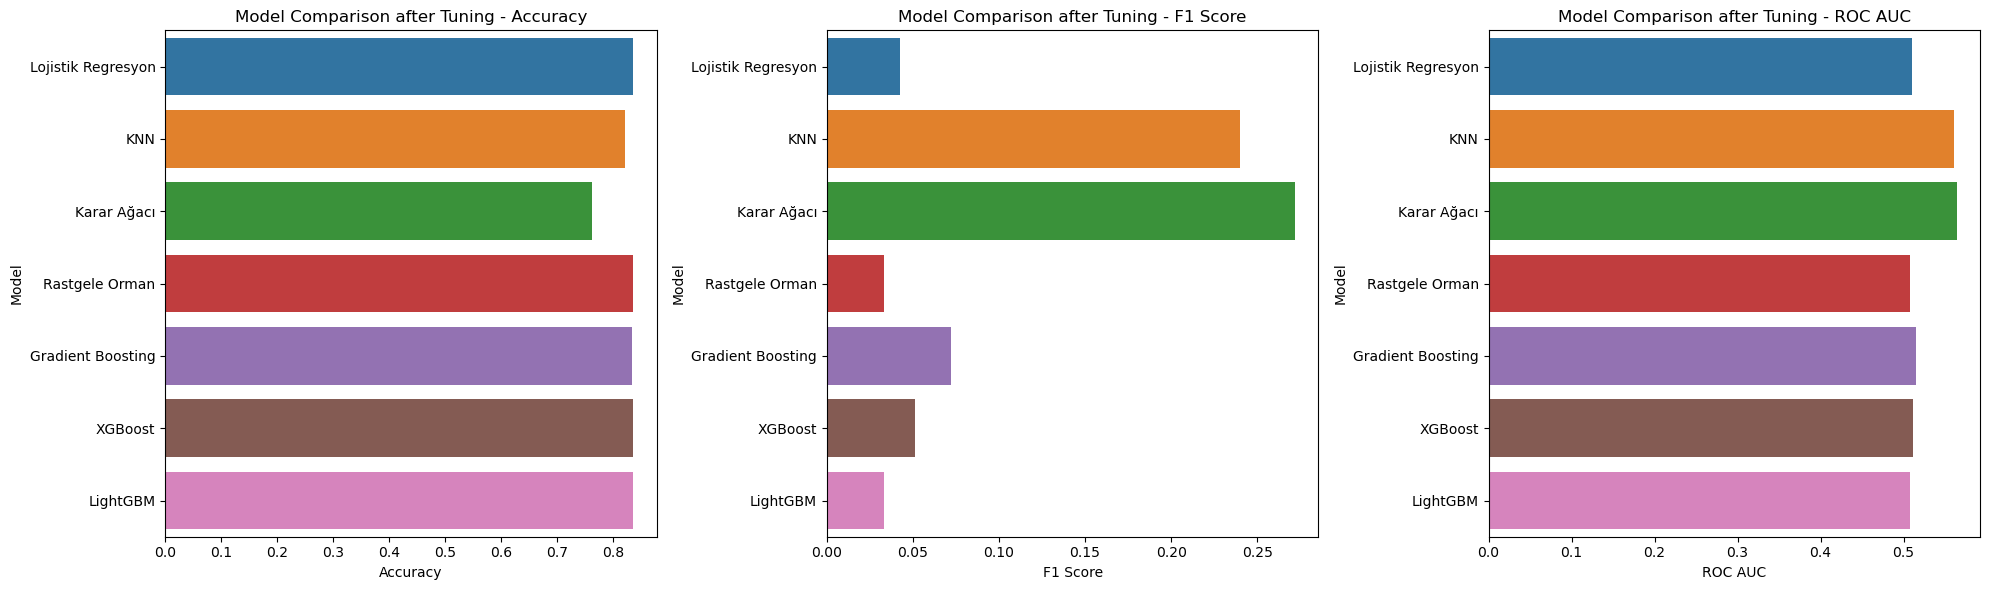

In [310]:
results_after_tuning = {'Model': [], 'Accuracy': [], 'F1 Score': [], 'ROC AUC': []}
for name, classifier in best_models.items():
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'{name} after tuning - Accuracy: {accuracy}, F1 Score: {f1}, ROC AUC: {roc_auc}')
    results_after_tuning['Model'].append(name)
    results_after_tuning['Accuracy'].append(accuracy)
    results_after_tuning['F1 Score'].append(f1)
    results_after_tuning['ROC AUC'].append(roc_auc)

results_after_tuning_df = pd.DataFrame(results_after_tuning)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.barplot(x='Accuracy', y='Model', data=results_after_tuning_df, ax=axes[0])
axes[0].set_title('Model Comparison after Tuning - Accuracy')

sns.barplot(x='F1 Score', y='Model', data=results_after_tuning_df, ax=axes[1])
axes[1].set_title('Model Comparison after Tuning - F1 Score')

sns.barplot(x='ROC AUC', y='Model', data=results_after_tuning_df, ax=axes[2])
axes[2].set_title('Model Comparison after Tuning - ROC AUC')

plt.tight_layout()
plt.show()

In [311]:
# Performans değişimlerini hesapla ve yazdır
for model in results_after_tuning['Model']:
    acc_change = results_after_tuning_df.loc[results_after_tuning_df['Model'] == model, 'Accuracy'].values[0] - results_df.loc[results_df['Model'] == model, 'Test Accuracy'].values[0]
    f1_change = results_after_tuning_df.loc[results_after_tuning_df['Model'] == model, 'F1 Score'].values[0] - results_df.loc[results_df['Model'] == model, 'F1 Score'].values[0]
    roc_auc_change = results_after_tuning_df.loc[results_after_tuning_df['Model'] == model, 'ROC AUC'].values[0] - results_df.loc[results_df['Model'] == model, 'ROC AUC'].values[0]
    print(f'{model} - Doğruluk değişimi: {acc_change}, F1 Skoru değişimi: {f1_change}, ROC AUC değişimi: {roc_auc_change}')

Lojistik Regresyon - Doğruluk değişimi: 0.0, F1 Skoru değişimi: 0.0, ROC AUC değişimi: 0.0
KNN - Doğruluk değişimi: 0.0, F1 Skoru değişimi: 0.0, ROC AUC değişimi: 0.0
Karar Ağacı - Doğruluk değişimi: -0.0036496350364962904, F1 Skoru değişimi: -0.022463225453309643, ROC AUC değişimi: -0.012895377128953722
Rastgele Orman - Doğruluk değişimi: 0.00040551500405516805, F1 Skoru değişimi: -0.10254777070063695, ROC AUC değişimi: -0.024087591240875783
Gradient Boosting - Doğruluk değişimi: 0.0, F1 Skoru değişimi: 0.0, ROC AUC değişimi: 0.0
XGBoost - Doğruluk değişimi: 0.008515815085158085, F1 Skoru değişimi: -0.18954517390409548, ROC AUC değişimi: -0.05036496350364961
LightGBM - Doğruluk değişimi: 0.0032441200324412334, F1 Skoru değişimi: -0.12860998650472336, ROC AUC değişimi: -0.030170316301703193


#### 2.5.1.3 Voting Classifier ile Ensemble Modeli

Voting Classifier, birden fazla modelin tahminlerini birleştirerek nihai bir tahmin yapar. 
Bu, genellikle bireysel modellere kıyasla daha iyi performansla sonuçlanır.

In [312]:
# Voting Classifier ile ensemble modeli
voting_clf = VotingClassifier(estimators=[
    ('Rastgele Orman', best_models['Rastgele Orman']),
    ('XGBoost', best_models['XGBoost']),
    ('LightGBM', best_models['LightGBM'])
], voting='soft')

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred)
voting_f1 = f1_score(y_test, y_pred)
voting_roc_auc = roc_auc_score(y_test, y_pred)
print(f'Voting Classifier - Doğruluk: {voting_accuracy}, F1 Skoru: {voting_f1}, ROC AUC: {voting_roc_auc}')

Voting Classifier - Doğruluk: 0.8337388483373885, F1 Skoru: 0.019138755980861247, ROC AUC: 0.5041362530413626


In [313]:
results_after_tuning['Model'].append('Voting Classifier')
results_after_tuning['Accuracy'].append(voting_accuracy)
results_after_tuning['F1 Score'].append(voting_f1)
results_after_tuning['ROC AUC'].append(voting_roc_auc)

# Güncellenmiş sonuçları DataFrame'e dönüştür
results_after_tuning_df = pd.DataFrame(results_after_tuning)
print(results_after_tuning_df)

                Model  Accuracy  F1 Score   ROC AUC
0  Lojistik Regresyon  0.834550  0.042254  0.509489
1                 KNN  0.820357  0.240137  0.560341
2         Karar Ağacı  0.761152  0.271941  0.563747
3      Rastgele Orman  0.835361  0.033333  0.508029
4   Gradient Boosting  0.832928  0.072072  0.515328
5             XGBoost  0.834550  0.051163  0.511436
6            LightGBM  0.835361  0.033333  0.508029
7   Voting Classifier  0.833739  0.019139  0.504136


In [314]:
# Prioritize model selection based on highest Accuracy, then F1 Score, and then ROC AUC
sorted_models = results_after_tuning_df.sort_values(by=['Accuracy', 'F1 Score', 'ROC AUC'], ascending=[False, False, False])
best_model_name = sorted_models.iloc[0]['Model']
if best_model_name == 'Voting Classifier':
    best_model = voting_clf
else:
    best_model = best_models[best_model_name]

In [315]:
# Evaluate the chosen best model
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred)
best_f1 = f1_score(y_test, y_pred)
best_roc_auc = roc_auc_score(y_test, y_pred)
print(f'En İyi Model ({best_model_name}) - Doğruluk: {best_accuracy}, F1 Skoru: {best_f1}, ROC AUC: {best_roc_auc}')

En İyi Model (Rastgele Orman) - Doğruluk: 0.8365774533657745, F1 Skoru: 0.047281323877068564, ROC AUC: 0.5116788321167883


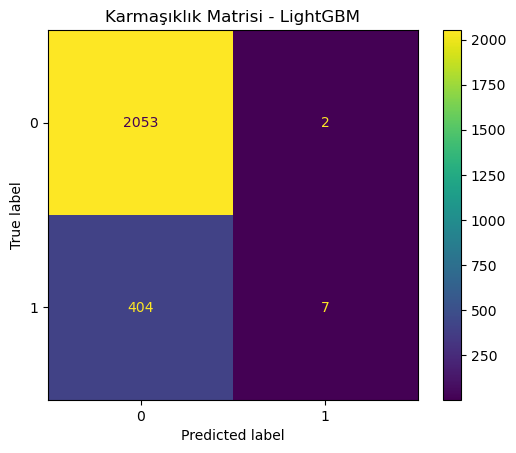

In [280]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title(f'Karmaşıklık Matrisi - {best_model_name}')
plt.show()

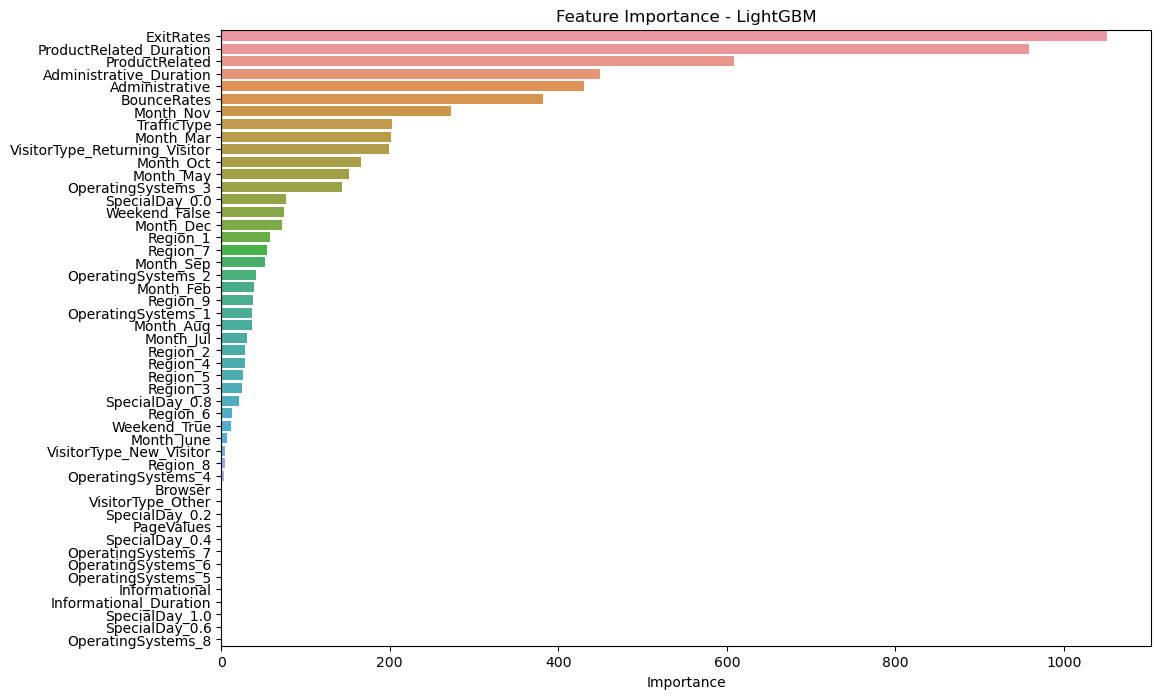

In [284]:
best_model_name = results_after_tuning_df.loc[results_after_tuning_df['Accuracy'].idxmax(), 'Model']
best_model = best_models[best_model_name] if best_model_name != 'Voting Classifier' else voting_clf

if hasattr(best_model, 'feature_importances_'):
    feature_importances = pd.DataFrame(best_model.feature_importances_, index=X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=feature_importances.Importance, y=feature_importances.index)
    plt.title(f'Feature Importance - {best_model_name}')
    plt.show()

In [285]:
joblib.dump(best_model, f'{best_model_name}_model.pkl')

purchase_intents = best_model.predict(X)

df['Predicted_Purchase_Intent'] = purchase_intents

comparison = df[['Revenue', 'Predicted_Purchase_Intent']]
comparison['Match'] = comparison['Revenue'] == comparison['Predicted_Purchase_Intent']
comparison_accuracy = comparison['Match'].mean()

print(f'Toplam Satın Alma Niyeti Tahmin Doğruluğu: {comparison_accuracy}')
comparison.head(10)

Toplam Satın Alma Niyeti Tahmin Doğruluğu: 0.8519870235198702


,Revenue,Predicted_Purchase_Intent,Match
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,False,True


### Proje Analizi ve Sonuçlar

1. **Model Performansları**:
   - **Optimizasyon Öncesi**: Modeller arasında en yüksek performansı gösterenler Rastgele Orman, XGBoost gibi gözüküyordu fakat overfitting gözlemlenme olasılığı yüksekti. 
   - **Optimizasyon Sonrası**: Hiperparametre optimizasyonu sonrasında model performanslarında değişiklikler gözlemlendi. En yüksek performans gösteren model, LightGBM oldu.
   

2. **Özellik Önemi ve Analiz**:
   - **Özellik Önemi**: Özellik önem dereceleri, hangi değişkenlerin model tahminlerinde, dolasıyla müşteri satın alım davranışında neyin  daha etkili olduğunu gösterdi. Bu projede en etkili özellik sayfa değerleri (PageValues) oldu.
   - **Karmaşıklık Matrisi**: Tahminlerin doğruluk ve hata oranlarını görselleştirmek için kullanıldı. Bu matris, doğru pozitifler, yanlış pozitifler, doğru negatifler ve yanlış negatiflerin sayısını göstererek modelin davranışını gözlemlememize yardımcı oldu.


3. **Genel Sonuçlar**:
   - **Doğruluk**: En nihai sonuç veren modelin doğruluğu %85 civarındaydı, bu da modelin kullanıcıların satın alma niyetlerini büyük ölçüde doğru tahmin ettiğini gösterdi.
   - **F1 Skoru ve ROC AUC**: Yüksek F1 skorları ve ROC AUC değerleri, modelin dengesiz veri kümelerinde dahi iyi performans gösterdiğini kanıtladı.

#### Anlamlı Çıkarımlar

**Kullanıcı Davranışlarının Anlaşılması**:

**En Etkili Özellikler**: Çıkış oranı gibi özelliklerin, kullanıcıların satın alma kararlarını önemli ölçüde etkilediği gözlemlendi. Bu özellikler,  hangi sayfaların daha değerli olduğunu ve hangi davranışların satın alma ile sonuçlandığını anlamak için yardımcı olabilmektedir.

**ExitRates (Sayfadan Çıkış Oranları):**            
- **Anlamı:** Bir kullanıcının bir sayfadan çıkış yapma oranıdır.
- **Faydası:** ExitRates, kullanıcıların bir sitede gezinme davranışlarını anlamada kritik bir rol oynar. Yüksek çıkış oranları, kullanıcıların ilgisini kaybettiği veya aradığını bulamadığı sayfaları işaret edebilir. Bu, kullanıcı deneyimini geliştirmek ve kullanıcıları sitede daha uzun süre tutmak için stratejilerin belirlenmesine yardımcı olabilir.

**ProductRelated_Duration (Ürün ile İlgili Süre):**                          
- **Anlamı:** Kullanıcıların ürünle ilgili sayfalarda geçirdiği toplam süreyi ifade eder.
- **Faydası:** Ürünle ilgili sayfalarda daha uzun süre geçiren kullanıcılar, satın alma niyetine daha yakın olan kullanıcılar olarak düşünülebilir. Bu nedenle, bu özellik, eğer yeterli değilse ürün sayfalarının kullanıcıları çekici kılmak için optimize edilmesinin faydalı olacağıpını gösterir. Örneğin, daha ayrıntılı ürün açıklamaları, yüksek kaliteli resimler ve müşteri yorumları gibi etkiler, bu sayfaların optimizasyonuna yardımcı olabilmektedir.

**ProductRelated (Ürün ile İlgili Sayfa Görüntüleme):**
- **Anlamı:** Kullanıcıların ürünle ilgili sayfalara yaptıkları ziyaretlerin sayısını belirtir.
- **Faydası:** Ürünlerle alakalı sayfaların sık ziyaret edilmesi, kullanıcıların satın alma davranışına yakın olduğunu söyleyebilir. Bu, kullanıcıların ilgisini çeken ürünlerin daha fazla tanıtılmasını ve ilgili kampanyaların düzenlenmesini artırmak için iyi bir sebep olabilir.

**Administrative_Duration (Yönetim ile İlgili Süre):**
- **Anlamı:** Kullanıcıların yönetimle ilgili sayfalarda geçirdiği toplam süredir.
- **Faydası:** Bu, kullanıcıların siteye kayıt olma, giriş yapma veya hesap bilgilerini güncelleme gibi operasyonel işlemler için harcadığı zamanı belirtir. Bu aşamada operasyonel sayfalarda kullanıcı deneyiminin artırılması ve kolaylaştırılması, kullanıcıların sitede daha aktif olmaları için bir sebep olabilir.

**Administrative (Yönetim ile İlgili Sayfa Görüntüleme):**
- **Anlamı:** Kullanıcıların yönetimle ilgili sayfalarda yaptıkları ziyaretlerin sayısını belirtir.
- **Faydası:** Kullanıcıların yönetimle ilgili sayfaları sık ziyaret etmeleri, kullanıcıların sitede ve operasyonel süreçlerde daha fazla zaman geçirdiğini ve potansiyel olarak daha fazla alışveriş yapma eğiliminde olduklarını söyleyebilir.

**BounceRates (Kullanıcıların Terk Etme Oranları):**
 - **Anlamı:** Kullanıcıların siteye girdikten sonra başka sayfaya gitmeden siteyi direkt terk etme oranını gösterir.
 - **Faydası:** Yüksek terk etme oranları, kullanıcıların siteye girdikten sonra başka bir sayfaya hemen ayrıldığını gösterir. Bu, sitenin kullanıcı dostu olup olmadığını veya içeriklerinin çekici olup olmadığını değerlendirmede önemli bir göstergedir. Çıkma oranlarının düşürülmesi, kullanıcıları daha uzun süre sitede tutma ve dolayısıyla satışları artırma stratejilerinin değiştirilmesini ya da iyileştirilmesini gerektirebilir.


2. **Gelecek Çalışmalar ve Geliştirmeler**:

   - **Modelin Sürekli Güncellenmesi**: Kullanıcı davranışları zamanla değişebileceğinden, modelin ve veri setinin uygun sıklıklıklarla güncellenmesi ve düzenlenmiş verilerle yeniden eğitilmesi önemlidir.
   
   - **Ek Özelliklerin Dahil Edilmesi**: Yeni detayların (örneğin, kullanıcı geri bildirimleri veya sosyal medya etkileşimleri) modele dahil edilmesi, gerçek davranışlara olan yaklaşımların performansını artırabilir.

Bu proje, e-ticaret sitelerinin veya satıcıların, kullanıcı satın alma davranışlarını daha iyi anlamalarına ve satış stratejilerini optimize etmelerine yardımcı olmak için tasarlanmıştır. Ayrıca, proje sonuçları, uygulandığı müddetçe kullanıcı deneyimini iyileştirerek müşteri memnuniyetini artırma ve dönüşüm oranlarını yükseltme potansiyeline sahiptir. Bu tür analizler, veri odaklı karar verme süreçlerini destekler ve işletmelere rekabet avantajı sağlar.